In [1]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00


In [2]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=YBHPSDoiL1A"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'YBHPSDoiL1A'

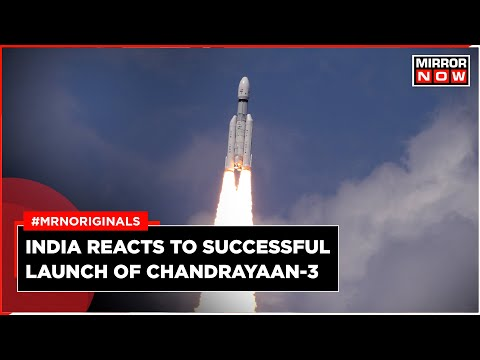

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'text': 'three two one zero', 'start': 0.02, 'duration': 5.82},
 {'text': 'we are proud of his row Israel ISRO go',
  'start': 5.96,
  'duration': 6.22},
 {'text': 'good luck Good Luck Good Luck', 'start': 9.599, 'duration': 8.44},
 {'text': '[Applause]', 'start': 12.18, 'duration': 5.859},
 {'text': 'thank you', 'start': 31.26, 'duration': 2.72}]

In [ ]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

2910


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 three two one zero we are proud of his row Israel ISRO go good luck Good Luck Good Luck [Applause] thank you three two one zero this story and in 204 now the s200s have been separated there in front of me dreams of a billion Indians taking off as we look to write a new chapter in the Indian Space Odyssey more importantly of course after the failure of chandrian 2 many have been hoping that this day is you know in front of us very soon and it is right now happening right in front of our eyes as we see this humongous rocket any time now of course you would look at you know a small separation of swords as it leaves their Earth's atmosphere and you can see of course the crackling sound and it uh somewhere it shows you the the progress of ISRO the efforts that the scientists have put in all of that bearing fruit in this successful launch up until now that we're looking at and in a few days from now on the 23rd of August is when we are expecting the satellite with the land down 

In [ ]:
len(str(summarized_text))

928

In [ ]:
str(summarized_text)

'[\' In 204 now the s200s have been separated there in front of me dreams of a billion Indians taking off as we look to write a new chapter in the Indian Space Odyssey . In a few days from now on the 23rd of August is when we are expecting the satellite with the land down on the Rover .\', \' Israel and as Indians we can achieve any miles Zone that we dream of [Music] congratulations India [Applause] three and three has started his journey towards Moon . ISRO has already put Chandra and three craft into the precise orbit around Earth 170 by 36 500 kilometer was this internet Target orbit .\', " I feel absolutely exhilarated and it was an amazing experience it\'s an opportunity we get to experience once in our life and I hope it\'s a good Mission I hope we get new upwards new information about the moon . Most of us are really passionate and we want to like uh yeah . Mostly all of us were interested in science and space ."]'